In [41]:
# import the needed libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')   
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from gensim.models import LdaModel

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aaaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aaaaa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
#Import the datasets
Comcast_telecom_df = pd.read_csv('Comcast_telecom_complaints_data.csv')

## 1. Data exploration and preprocessing

In [43]:
Comcast_telecom_df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No
5,338519,ISP Charging for arbitrary data limits with ov...,06-12-15,06-Dec-15,9:59:40 PM,Internet,Acworth,Georgia,30101,Solved,No
6,361148,Throttling service and unreasonable data caps,24-06-15,24-Jun-15,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Pending,No
7,359792,Comcast refuses to help troubleshoot and corre...,23-06-15,23-Jun-15,6:56:14 PM,Internet,Adrian,Michigan,49221,Solved,No
8,318072,Comcast extended outages,06-01-15,06-Jan-15,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,Comcast Raising Prices and Not Being Available...,28-06-15,28-Jun-15,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


In [44]:
Comcast_telecom_df.shape

(2224, 11)

In [45]:
Comcast_telecom_df.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [46]:
Comcast_telecom_df.describe(include= 'all')

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,351079,Comcast,24-06-15,24-Jun-15,2:31:19 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [47]:
#zero null value
Comcast_telecom_df.isna().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

In [48]:
Comcast_telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [49]:
Comcast_telecom_df["Time"] = pd.to_datetime(Comcast_telecom_df["Time"]) 
Comcast_telecom_df["Date"] = pd.to_datetime(Comcast_telecom_df["Date"]) 
Comcast_telecom_df["Date_month_year"] = pd.to_datetime(Comcast_telecom_df["Date_month_year"])

In [50]:
Comcast_telecom_df.dtypes

Ticket #                               object
Customer Complaint                     object
Date                           datetime64[ns]
Date_month_year                datetime64[ns]
Time                           datetime64[ns]
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [51]:
# refrense(https://www.kaggle.com/professionalhima/comcast-customer-complaints)
Comcast_telecom_df['monthly'] = Comcast_telecom_df["Date_month_year"].apply(lambda x: x.month)
Comcast_telecom_df['Weekly'] = Comcast_telecom_df['Date_month_year'].apply(lambda x: x.dayofweek)
Comcast_telecom_df['daily'] = Comcast_telecom_df["Date_month_year"].apply(lambda x: x.day)

In [52]:
weekMap = {0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'}
Comcast_telecom_df['Weekly'] = Comcast_telecom_df['Weekly'].map(weekMap)

In [53]:
Comcast_telecom_df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,monthly,Weekly,daily
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,2021-10-30 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed,22
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,2021-10-30 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,8,Tue,4
2,242732,Speed and Service,2015-04-18,2015-04-18,2021-10-30 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,4,Sat,18


## 2. Data Analysis and Visualization

<AxesSubplot:xlabel='monthly', ylabel='Customer Complaint'>

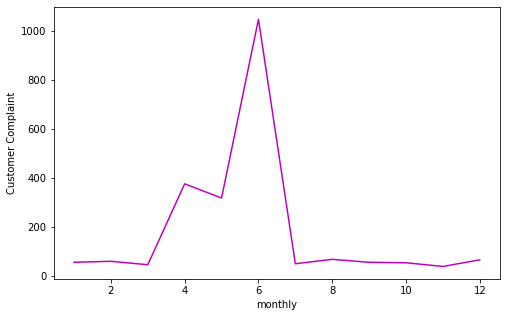

In [54]:
# Plotting for the number of complaints at monthly levels
plt.figure(figsize=(8,5))
monthly_complaints = Comcast_telecom_df.groupby('monthly').count().reset_index()
sns.lineplot(x='monthly', y='Customer Complaint', data = monthly_complaints, color = 'm',sort=False,markers = "o")

On monthly level, the maximum number of the customer complaints was in June.

<AxesSubplot:xlabel='daily', ylabel='Customer Complaint'>

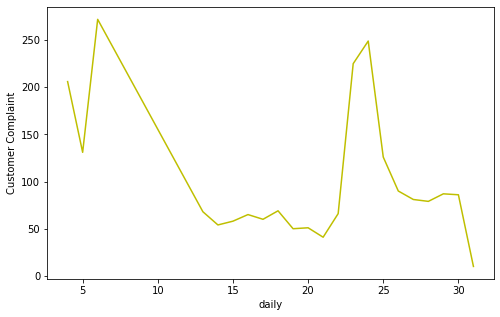

In [55]:
# Plotting complaints for the number of complaints at daily levels
plt.figure(figsize=(8,5))
daily_complaints = Comcast_telecom_df.groupby('daily').count().reset_index()
sns.lineplot(x='daily', y='Customer Complaint', data = daily_complaints, color = 'y', sort=False,markers = "o")

On daily level, the maximum number of the customer complaints was at the start and end of each month.

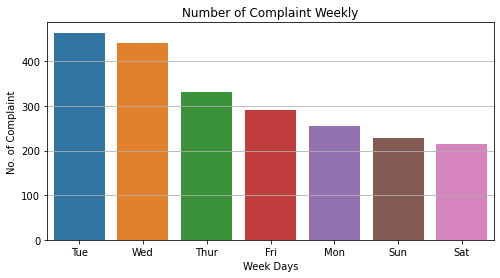

In [56]:
# Plotting the number of complaints at Weekly levels
plt.figure(figsize=(8,4))
sns.countplot(x='Weekly', data= Comcast_telecom_df , order= Comcast_telecom_df['Weekly'].value_counts().index) 
plt.title('Number of Complaint Weekly')
plt.xlabel('Week Days')
plt.ylabel('No. of Complaint')
plt.grid(axis='y')
plt.show()

On Weekly level, the maximum number of the customer complaints was on Tuesday and wednesday. 

In [57]:
# table with the frequency of complaint types
frequency_of_complaint = Comcast_telecom_df['Customer Complaint'].value_counts()
frequency_df = pd.DataFrame(data=frequency_of_complaint).reset_index() 
frequency_df.rename(columns={'index':'Customer Complaint', 'Customer Complaint':'Frequency'}, inplace=True)
frequency_df

,Customer Complaint,Frequency
0,Comcast,83
1,Comcast Internet,18
2,Comcast Data Cap,17
3,comcast,13
4,Comcast Data Caps,11
...,...,...
1836,Comcast credit after cancellation has not been...,1
1837,Xfinity False Advertisement,1
1838,Dishonest Billing Practices,1
1839,"Comcast - Fraudulent Billing Practices, Unwill...",1


In [58]:
!pip install wordcloud

In [59]:
pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [60]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop]) 
    punc_free = "".join([ch for ch in stop_free if ch not in exclude]) 
    normalised = " ".join(lemma.lemmatize(word) for word in punc_free.split()) 
    return normalised

In [61]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [62]:
doc_complete = Comcast_telecom_df["Customer Complaint"].tolist()
types = []
for doc in doc_complete: 
    lists = clean(doc).split()
    for i in lists:
        types.append(i)

In [63]:
arr = np.array(types)
values, counts = np.unique(arr, return_counts=True)
print(values, counts)

['0057' '037' '1' ... 'youtube' 'ypsilanti' 'yr'] [1 1 1 ... 1 1 1]


In [64]:
df = pd.DataFrame()
df['values']=pd.Series(values)
df['counts']=pd.Series(counts)
df.head()

,values,counts
0,0057,1
1,037,1
2,1,1
3,10,8
4,100,1


In [65]:
# 10 top complaint types (Comcast, Internet, Service, Billing, Data, Speed)
df.sort_values(by=['counts'],ascending=False).head(6)

,values,counts
274,comcast,1183
673,internet,517
1128,service,496
182,billing,283
365,data,219
1178,speed,187


In [66]:
# Status variable with value as Open and Closed. 
Comcast_telecom_df['Status'] = ["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in Comcast_telecom_df["Status"]]

In [67]:
Comcast_telecom_df.head(10)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,monthly,Weekly,daily
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,2021-10-30 15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,Wed,22
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,2021-10-30 10:22:56,Internet,Acworth,Georgia,30102,Closed,No,8,Tue,4
2,242732,Speed and Service,2015-04-18,2015-04-18,2021-10-30 09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes,4,Sat,18
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,2015-07-05,2021-10-30 11:59:35,Internet,Acworth,Georgia,30101,Open,Yes,7,Sun,5
4,307175,Comcast not working and no service to boot,2015-05-26,2015-05-26,2021-10-30 13:25:26,Internet,Acworth,Georgia,30101,Closed,No,5,Tue,26
5,338519,ISP Charging for arbitrary data limits with ov...,2015-06-12,2015-12-06,2021-10-30 21:59:40,Internet,Acworth,Georgia,30101,Closed,No,12,Sun,6
6,361148,Throttling service and unreasonable data caps,2015-06-24,2015-06-24,2021-10-30 10:13:55,Customer Care Call,Acworth,Georgia,30101,Open,No,6,Wed,24
7,359792,Comcast refuses to help troubleshoot and corre...,2015-06-23,2015-06-23,2021-10-30 18:56:14,Internet,Adrian,Michigan,49221,Closed,No,6,Tue,23
8,318072,Comcast extended outages,2015-06-01,2015-01-06,2021-10-30 23:46:30,Customer Care Call,Alameda,California,94502,Closed,No,1,Tue,6
9,371214,Comcast Raising Prices and Not Being Available...,2015-06-28,2015-06-28,2021-10-30 18:46:31,Customer Care Call,Alameda,California,94501,Open,Yes,6,Sun,28


<AxesSubplot:ylabel='State'>

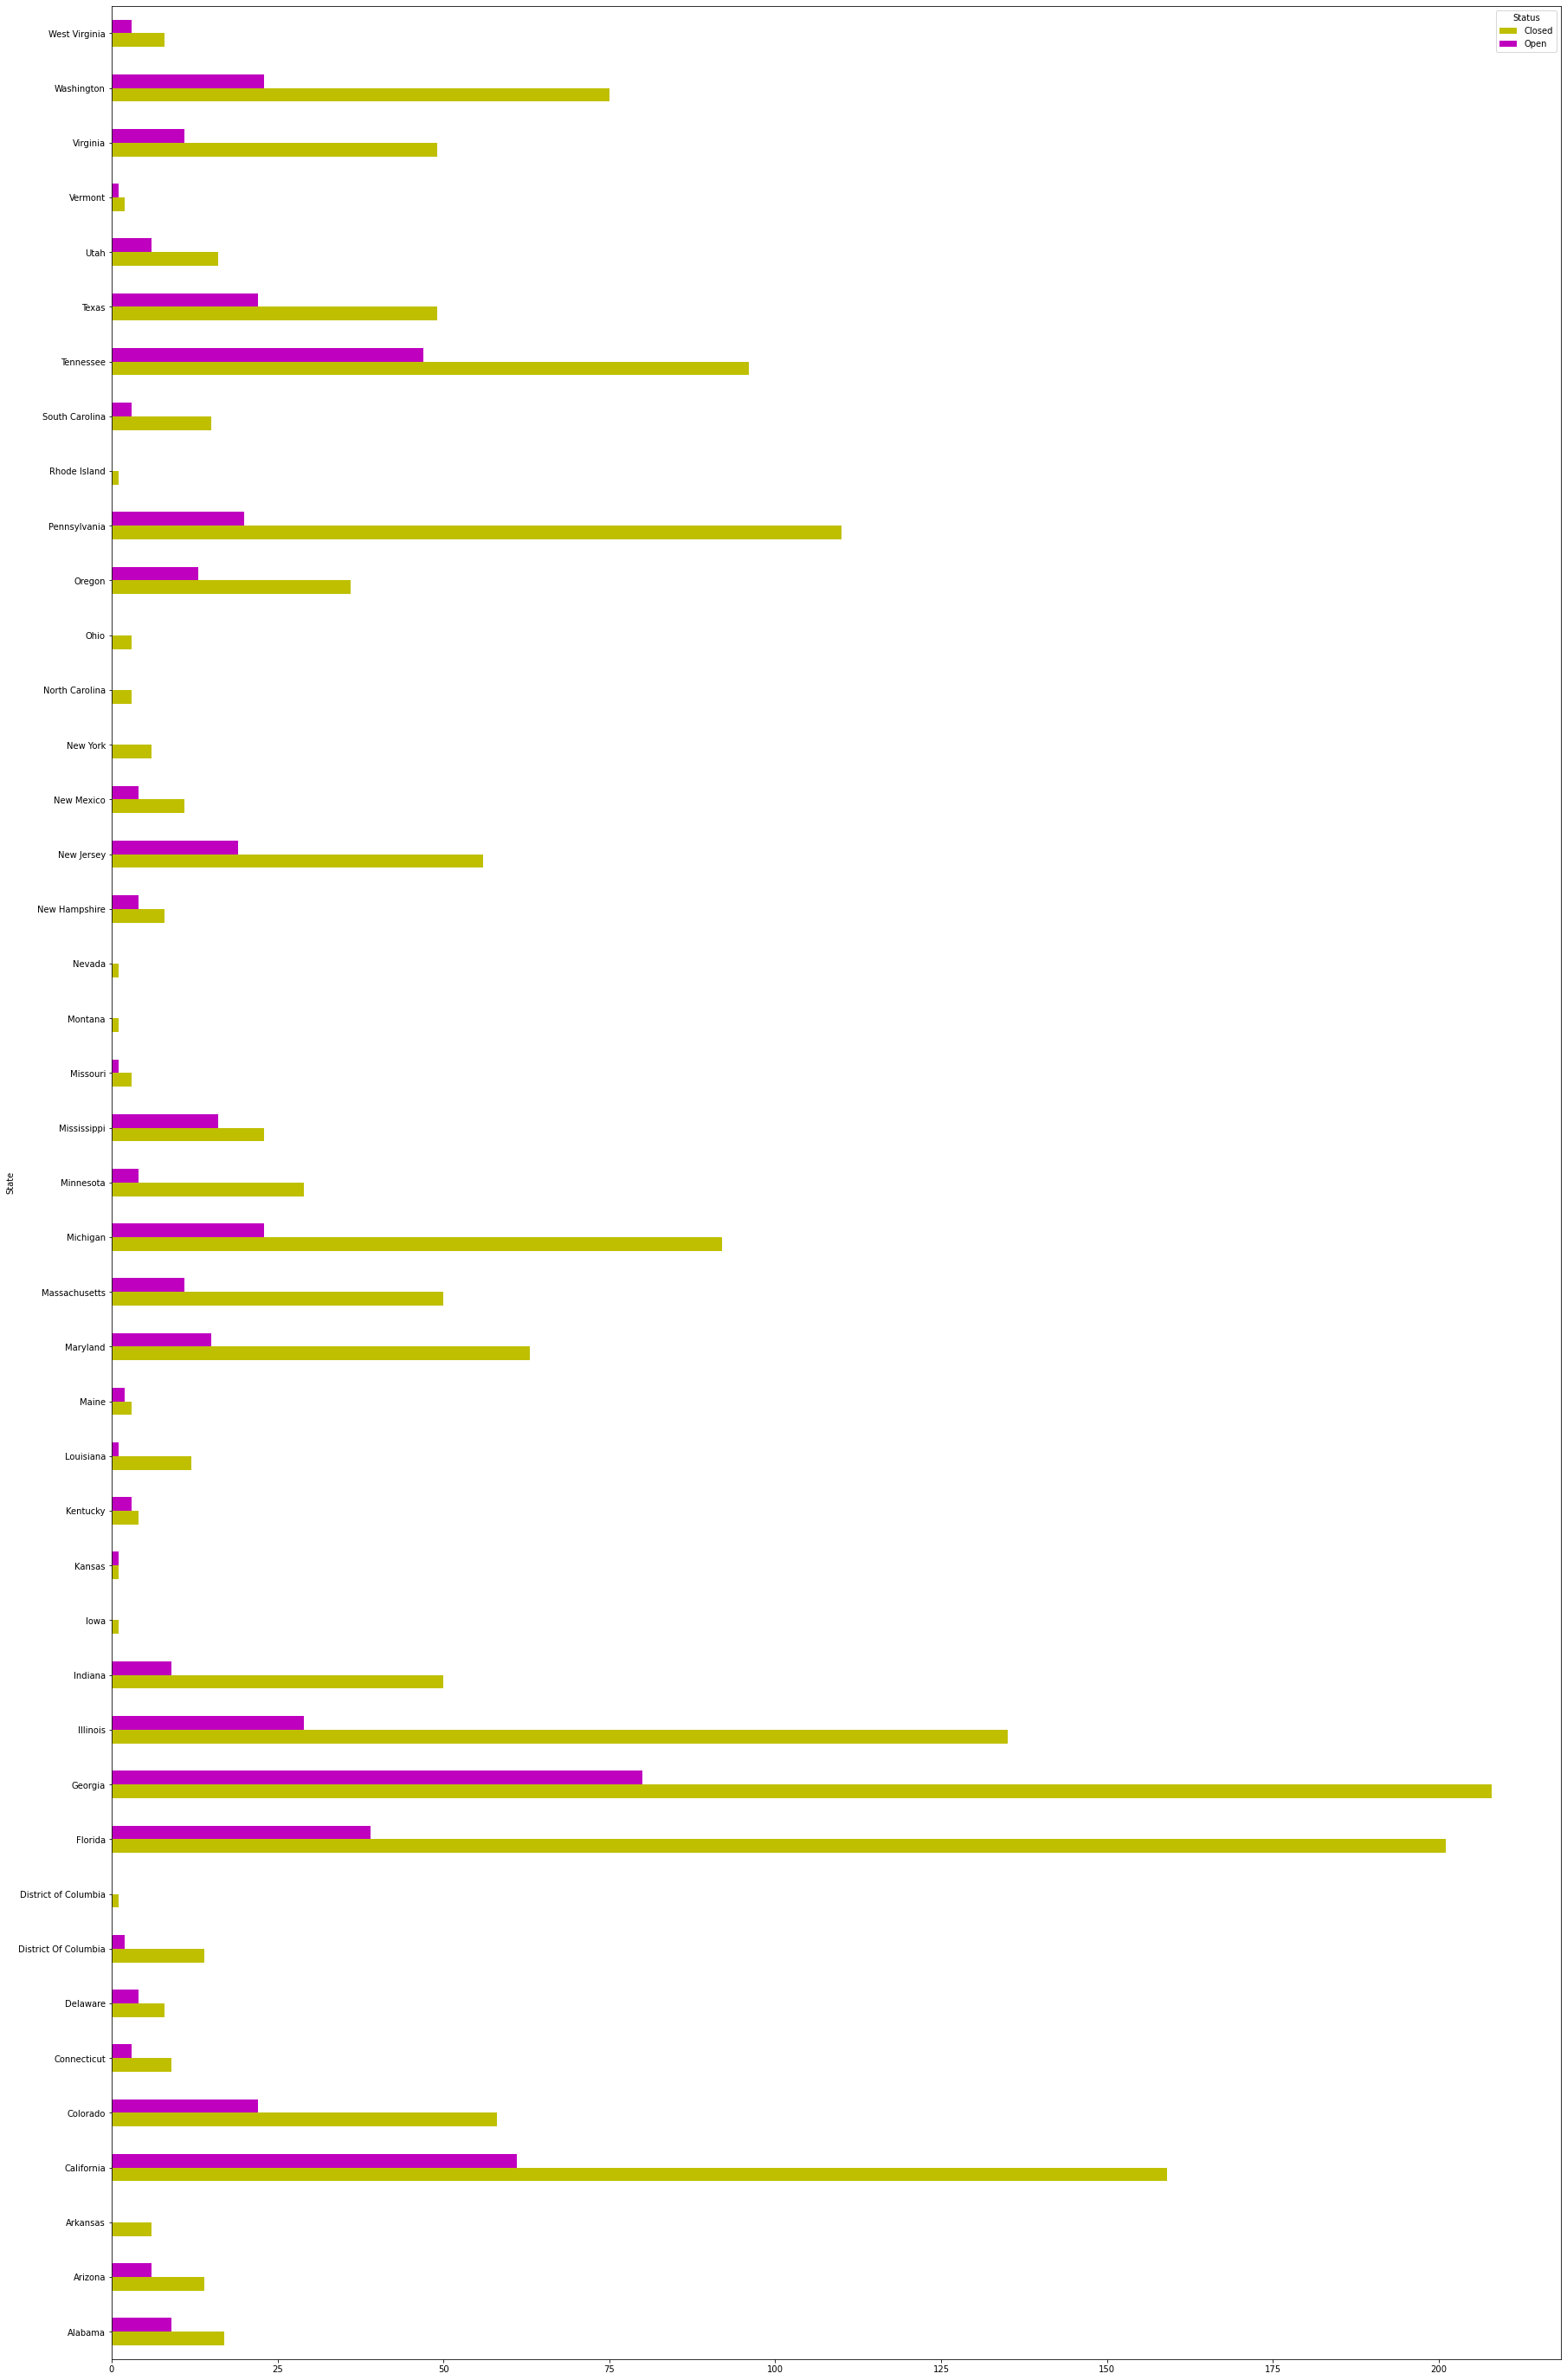

In [68]:
groupby_complaints_Status = Comcast_telecom_df.groupby(["State","Status"]).size().unstack()
groupby_complaints_Status.plot(kind="barh", figsize=(30,50), color=['y','m'])

In [69]:
Comcast_telecom_df['State'].value_counts().head(3)

Georgia       288
Florida       240
California    220
Name: State, dtype: int64

Georgia has the maximum complaints and As shown in the bar chart Georgia also has the highest percentage of unresolved complaints

In [70]:
# percentage of complaints resolved, which were received through the Internet and customer care calls.
groupby_Internet_calls = Comcast_telecom_df.groupby(['Received Via','Status']).size().unstack()
percentage_complaints_resolved = groupby_Internet_calls['Closed']/groupby_Internet_calls['Closed'].sum()*100
percentage_complaints_resolved

Received Via
Customer Care Call    50.615114
Internet              49.384886
Name: Closed, dtype: float64